In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv

In [2]:
# qubit_lists: list of list of qubit subsets to generate QV circuits
qubit_lists = [[0,1,3],[0,1,3,5],[0,1,3,5,7],[0,1,3,5,7,10]]
# ntrials: Number of random circuits to create for each subset
ntrials = 100

In [3]:
import warnings
warnings.filterwarnings('ignore')
qv_circs, qv_circs_nomeas = qv.qv_circuits(qubit_lists, ntrials)

In [4]:
# pass the first trial of the nomeas through the transpiler to illustrate the circuit
qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['u1','u2','u3','cx'])

In [5]:
qv_circs_nomeas[0][0].draw(fold=-1)

global phase: 5.2921
     ┌────────────────────────────┐                                                                                                    ┌───┐┌──────────────────────────┐┌───┐┌───────────────────────────┐┌───┐┌─────────────────────────────┐         ┌────────────────────┐           ┌──────────────────────┐       ┌────────────────────────────┐
q_0: ┤ U3(0.50722,2.9378,0.66757) ├────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├┤ U3(2.5539,1.0146,2.6642) ├┤ X ├┤ U3(1.8545,-1.8806,3.0522) ├┤ X ├┤ U3(0.90509,-2.0255,-1.8394) ├──■──────┤ U3(1.062,-π/2,π/2) ├─────■─────┤ U3(0.098151,-π,-π/2) ├────■──┤ U3(0.51416,2.5497,0.14389) ├
     ├────────────────────────────┤┌───┐┌────────────────────────┐┌───┐┌───────────────────────────┐┌───┐┌────────────────────────────┐└─┬─┘└─┬─────────────────────┬──┘└─┬─┘└───┬───────────────────┬───┘└─┬─┘└┬───────────────────────────┬┘┌─┴─┐┌───┴────────────────────┴──┐┌─┴─┐┌──┴──────────────────────┴─┐┌─┴─┐├────────────────────────────┤
q_1: ┤ U3(0.97566,-2.6687,3.0905) ├┤ X ├┤ U3(2.566,1.003,2.6503) ├┤ X ├┤ U3(1.8545,-1.8806,3.0522) ├┤ X ├┤ U3(2.7686,1.6958,-0.60819) ├──■────┤ U3(1.2116,-π/2,π/2) ├─────■──────┤ U3(0.42754,0,π/2) ├──────■───┤ U3(2.3097,1.7508,-2.9402) ├─┤ X ├┤ U3(2.6574,0.89084,2.5204) ├┤ X ├┤ U3(1.8545,-1.8806,3.0522) ├┤ X ├┤ U3(2.7398,-2.6112,-1.2063) ├
     ├────────────────────────────┤└─┬─┘└┬──────────────────────┬┘└─┬─┘└──┬─────────────────────┬──┘└─┬─┘├────────────────────────────┤       └─────────────────────┘            └───────────────────┘          └───────────────────────────┘ └───┘└───────────────────────────┘└───┘└───────────────────────────┘└───┘└────────────────────────────┘
q_2: ┤ U3(1.7674,-1.6711,-2.4439) ├──■───┤ U3(0.43928,-π/2,π/2) ├───■─────┤ U3(0.25736,-π,-π/2) ├─────■──┤ U3(0.75825,-2.408,0.98411) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     └────────────────────────────┘      └──────────────────────┘         └─────────────────────┘        └────────────────────────────┘

In [6]:
sv_sim = qiskit.Aer.get_backend('aer_simulator')
ideal_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    for qc in qv_circs_nomeas[trial]:
        qc.save_statevector()
    result = qiskit.execute(qv_circs_nomeas[trial], backend=sv_sim).result()
    ideal_results.append(result)
    print(f'Simulated trial {trial+1}/{ntrials}')

Simulated trial 100/100


In [7]:
qv_fitter = qv.QVFitter(qubit_lists=qubit_lists)
qv_fitter.add_statevectors(ideal_results)

In [8]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_outputs['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: ['010', '011', '100', '101']
qv_depth_4_trial_0: ['0010', '0100', '1000', '1010', '1100', '1101', '1110', '1111']
qv_depth_5_trial_0: ['00000', '00010', '00100', '00110', '01000', '01001', '01100', '01101', '01110', '01111', '10001', '10110', '10111', '11001', '11010', '11011']
qv_depth_6_trial_0: ['000111', '001000', '001010', '001011', '001100', '001101', '010001', '010100', '010101', '010110', '010111', '011000', '011001', '011010', '011101', '011110', '100010', '100011', '100100', '100101', '100111', '101000', '101010', '101011', '101110', '101111', '110001', '110101', '111001', '111011', '111100', '111111']


In [9]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_prob_ideal['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 0.7510573342861655
qv_depth_4_trial_0: 0.8110431027713279
qv_depth_5_trial_0: 0.8691843426417187
qv_depth_6_trial_0: 0.8386823853991194


In [10]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

In [11]:
aer_sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1024
exp_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    t_qcs = transpile(qv_circs[trial], basis_gates=basis_gates, optimization_level=3)
    qobj = assemble(t_qcs)
    result = aer_sim.run(qobj, noise_model=noise_model, max_parallel_experiments=0).result()
    exp_results.append(result)
    print(f'Completed trial {trial+1}/{ntrials}')

Completed trial 100/100


In [12]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 733
qv_depth_4_trial_0: 743
qv_depth_5_trial_0: 742
qv_depth_6_trial_0: 622


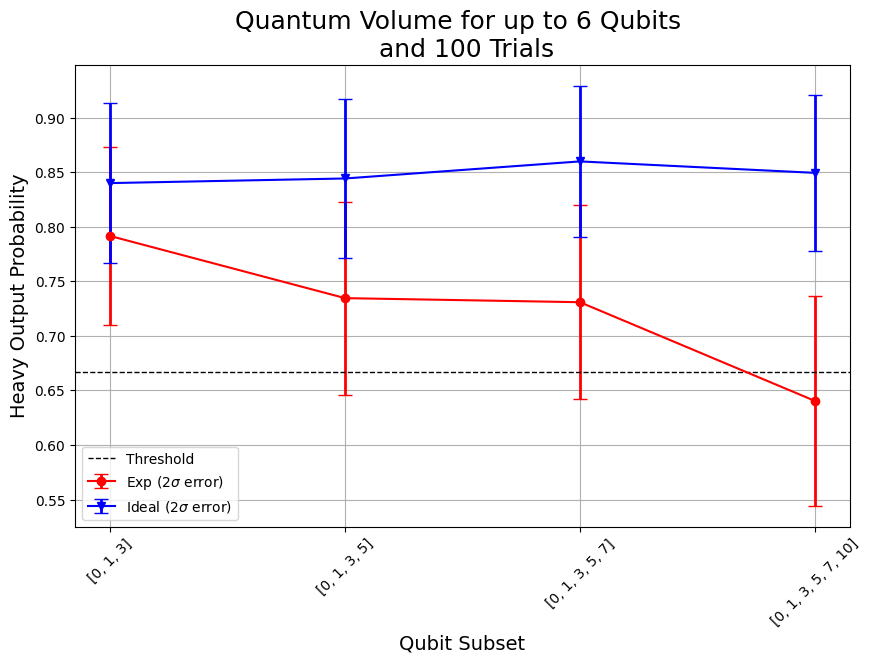

In [13]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()

In [14]:
qv_success_list = qv_fitter.qv_success()
qv_list = qv_fitter.ydata
QV = 1
for qidx, qubit_list in enumerate(qubit_lists):
    if qv_list[0][qidx]>2/3:
        if qv_success_list[qidx][0]:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (successful). Quantum volume %d"%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1],qv_fitter.quantum_volume()[qidx]))
            QV = qv_fitter.quantum_volume()[qidx]
        else:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (unsuccessful)."%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1]))
    else:
        print("Width/depth %d less than 2/3 (unsuccessful)."%len(qubit_list))

Width/depth 3 greater than 2/3 (0.791455) with confidence 0.998935 (successful). Quantum volume 8
Width/depth 4 greater than 2/3 (0.734531) with confidence 0.937835 (unsuccessful).
Width/depth 5 greater than 2/3 (0.730811) with confidence 0.925937 (unsuccessful).
Width/depth 6 less than 2/3 (unsuccessful).


In [15]:
print ("The Quantum Volume is:", QV) 

The Quantum Volume is: 8
